In [1]:
from Practical2 import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
dir = os.getcwd()

In [2]:
movies_df = pd.read_csv(f'{dir}/DATA/ml-25m/movies.csv')
ratings_df = pd.read_csv(f'{dir}/DATA/ml-25m/ratings.csv')

In [3]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [5]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [6]:
movies_df.describe()

,movieId
count,62423.000000
mean,122220.387646
std,63264.744844
min,1.000000
25%,82146.500000
50%,138022.000000
75%,173222.000000
max,209171.000000


In [7]:
#extracting the year from the names
year = movies_df['title'].str.findall('\((\d{4})\)').str.get(0)
movies_df['Year'] = year

In [8]:
#droping movie with out year
movies_df_without_na = movies_df.dropna(inplace=False)
movies_df_without_na['Year']= movies_df_without_na['Year'].astype(int)

/tmp/ipykernel_450758/2956874425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df_without_na['Year']= movies_df_without_na['Year'].astype(int)


In [9]:
movies_df_without_na.describe()

,movieId,Year
count,62013.000000,62013.000000
mean,121895.531953,1992.044700
std,63320.572248,25.364884
min,1.000000,1874.000000
25%,81698.000000,1976.000000
50%,137614.000000,2002.000000
75%,173009.000000,2012.000000
max,209171.000000,2019.000000


In [10]:
# 410 movies donot have year in their name
# we have a total of 62423

In [11]:
sortedmovies = movies_df_without_na['Year'].unique()
print(sorted(sortedmovies))

[1874, 1878, 1880, 1883, 1887, 1888, 1890, 1891, 1892, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [12]:
len(sortedmovies)

135

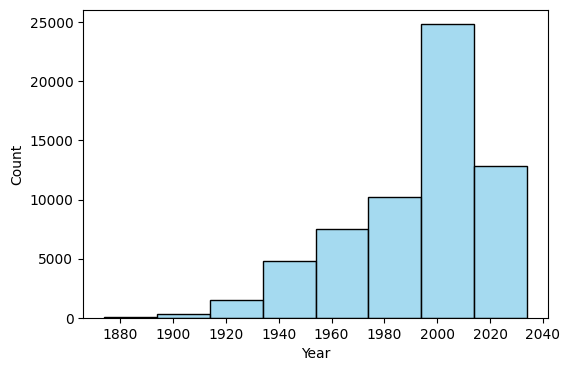

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(data=movies_df_without_na, x='Year', bins=range(movies_df_without_na['Year'].min(), movies_df_without_na['Year'].max() + 21, 20), kde=False, color='skyblue')
# plt.title('Distribution of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Count')

filename="Plots/movie_releas_year_plot.pdf"
plt.savefig(filename, bbox_inches="tight")

In [14]:
#counting the number of time a movie was rated
rating_count = ratings_df.groupby('movieId')['rating'].count().reset_index()
rating_count = pd.DataFrame(rating_count)
rating_count.rename({'rating': 'rating_count'}, axis=1, inplace=True)

#counting the number time a user gave a rating
user_count = ratings_df.groupby('userId')['rating'].count().reset_index()
user_count = pd.DataFrame(user_count)
user_count.rename({'rating': 'rating_count'}, axis=1, inplace=True)



In [15]:
genre = movies_df['genres'].str.split(pat='|', expand=True).fillna(0)
cols = genre.columns
genre[cols] = genre[cols].astype('category')
genre1 = genre.copy()
gen_columns = genre1.select_dtypes(['category']).columns

#count genres (non zeros)
genre1[gen_columns] = genre1[gen_columns].apply(lambda x: x.cat.codes)
movies_df['genre_count'] = genre1[cols].gt(0).sum(axis=1)
movies_df[cols] = genre[cols].astype('category')

movies_df.head()

,movieId,title,genres,Year,genre_count,0,1,2,3,4,5,6,7,8,9
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,Adventure,Animation,Children,Comedy,Fantasy,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3,Adventure,Children,Fantasy,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,2,Comedy,Romance,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,3,Comedy,Drama,Romance,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995,1,Comedy,0,0,0,0,0,0,0,0,0


In [16]:
#No of movies without genre
movies_df[movies_df['genre_count']==0]['genre_count'].count()

5062

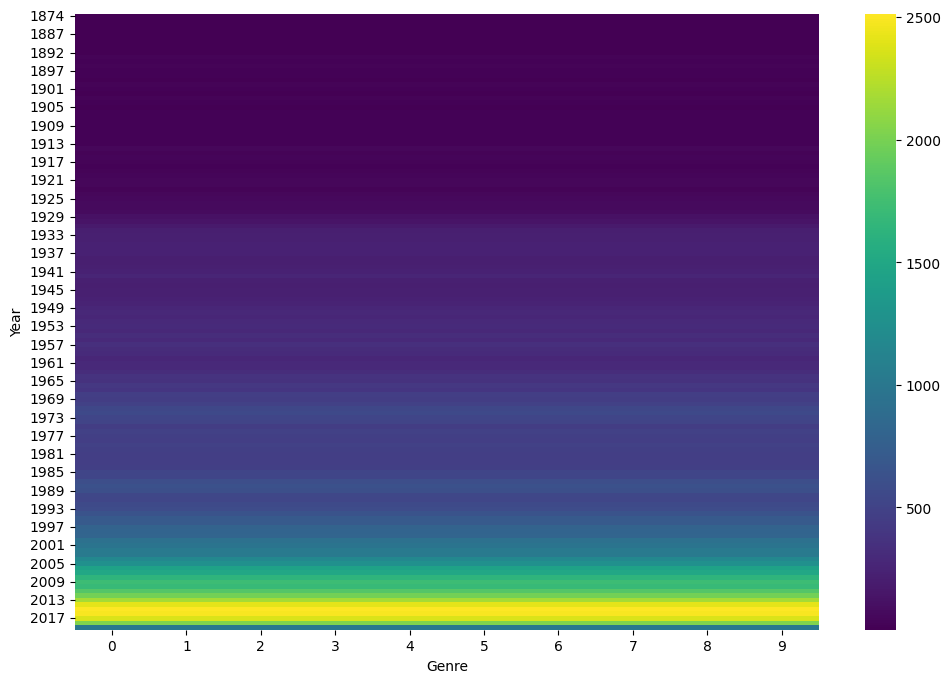

In [17]:
#relationship between year and genre
df_encoded = pd.concat([movies_df['Year'], genre], axis=1)

# Grouping by year and summing up the count of movies for each genre
genre_year_counts = df_encoded.groupby('Year').count()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_year_counts, cmap='viridis')
# plt.title('Number of Movies by Genre and Year')
plt.xlabel('Genre')
plt.ylabel('Year')

filename="Plots/heat_map_movie_genre_plot.pdf"
plt.savefig(filename, bbox_inches="tight")

In [18]:
#all unique genres
genres = np.unique([ gen_type for genre in movies_df['genres'].unique() for gen_type in genre.split('|')])
genres

array(['(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'], dtype='<U18')

movies_df['genre_count'].describe()

In [19]:
user_count = ratings_df.groupby('userId')['rating'].count().reset_index()
user_count = pd.DataFrame(user_count)
user_count

,userId,rating
0,1,70
1,2,184
2,3,656
3,4,242
4,5,101
...,...,...
162536,162537,101
162537,162538,154
162538,162539,47
162539,162540,88


In [20]:
# number of users
len(ratings_df['userId'].unique())

162541

In [21]:
movie_user_df =  ratings_df.merge(movies_df, on = 'movieId', how='inner')
movie_user_df['timestamp'] = pd.to_datetime(movie_user_df['timestamp'], unit='s')

# storing day of the week in a new column
movie_user_df['day_of_week'] = movie_user_df['timestamp'].dt.dayofweek

#representation of the day of the week 
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
movie_user_df['day_of_week'] = movie_user_df['day_of_week'].map(lambda x: day_names[x])

movie_user_df['hour'] = movie_user_df['timestamp'].dt.hour

# Mapping the hour to time of day categories
def categorize_time(hour):
    if 5 <= hour < 12:
        return "morning"
    elif 12 <= hour < 18:
        return "afternoon"
    else:
        return "evening"

movie_user_df['time_of_day'] = movie_user_df['hour'].apply(categorize_time)

In [22]:
user_rating_counts = movie_user_df.groupby('userId')['userId'].value_counts()

# Getting the user with the highest number of ratings
user_with_highest_ratings = user_rating_counts.idxmax()
print("The Id of the ",user_with_highest_ratings)
highest_user = movie_user_df[movie_user_df['userId'] == user_with_highest_ratings]

The Id of the  72315


In [23]:
user_rating_counts[72315]

32202

In [24]:
highest_user[['userId','day_of_week','title','rating']].describe(include=[object, 'category'])

,day_of_week,title
count,32202,32202
unique,7,32175
top,Tuesday,Ecstasy (2011)
freq,9250,2


In [25]:
highest_user[['userId','day_of_week','title','rating']][highest_user['title'] =="Ecstasy (2011)"]

,userId,day_of_week,title,rating
24901017,72315,Saturday,Ecstasy (2011),2.5
24981980,72315,Thursday,Ecstasy (2011),2.0


In [26]:
highest_user['rating'].describe()

count    32202.000000
mean         3.080601
std          0.744733
min          0.500000
25%          2.500000
50%          3.000000
75%          3.500000
max          5.000000
Name: rating, dtype: float64

In [27]:
movie_user_df.head()

,userId,movieId,rating,timestamp,title,genres,Year,genre_count,0,1,...,3,4,5,6,7,8,9,day_of_week,hour,time_of_day
0,1,296,5.0,2006-05-17 15:34:04,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1994,4,Comedy,Crime,...,Thriller,0,0,0,0,0,0,Wednesday,15,afternoon
1,3,296,5.0,2015-08-13 14:01:16,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1994,4,Comedy,Crime,...,Thriller,0,0,0,0,0,0,Thursday,14,afternoon
2,4,296,4.0,2019-11-16 21:14:58,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1994,4,Comedy,Crime,...,Thriller,0,0,0,0,0,0,Saturday,21,evening
3,5,296,4.0,1996-04-29 13:55:55,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1994,4,Comedy,Crime,...,Thriller,0,0,0,0,0,0,Monday,13,afternoon
4,7,296,4.0,1996-06-22 11:58:50,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1994,4,Comedy,Crime,...,Thriller,0,0,0,0,0,0,Saturday,11,morning


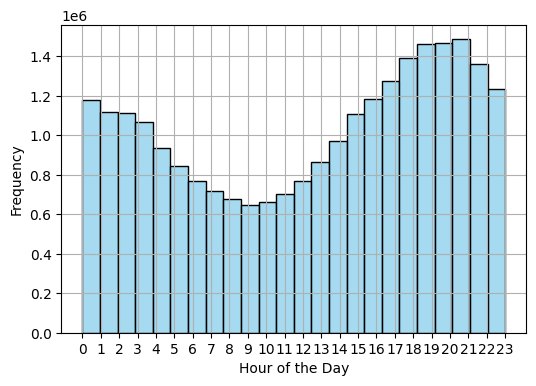

In [28]:
# Plotting the distribution of the hour
plt.figure(figsize=(6, 4))
sns.histplot(data=movie_user_df, x='hour', bins=24, color='skyblue')
# plt.title('Distribution of Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))  # Set x-axis ticks to show all hours
plt.grid(True)

filename="Plots/move_rating_hour_dist_plot.pdf"
plt.savefig(filename, bbox_inches="tight")

In [29]:
day_stats = movie_user_df[['day_of_week','time_of_day']]
day_stats.describe()

,day_of_week,time_of_day
count,25000095,25000095
unique,7,3
top,Sunday,evening
freq,3876693,13813235


In [30]:
genre = movie_user_df[0].value_counts()
genre = pd.DataFrame(genre)
genre = genre.reset_index()
genre.rename({0: 'genre', 'Count':'Count'}, axis=1, inplace=True)

In [31]:

# Count the occurrences of each genre
genre_counts = movie_user_df[0].value_counts()
genre_counts_df = pd.DataFrame(genre_counts.reset_index())
genre_counts_df.rename(columns={'index': 'genre', 0: 'genre'}, inplace=True)

genre_counts_df

,genre,count
0,Action,7446918
1,Comedy,5790524
2,Drama,4733571
3,Adventure,2485956
4,Crime,1741510
5,Horror,672956
6,Animation,583278
7,Children,475401
8,Documentary,273597
9,Mystery,250637


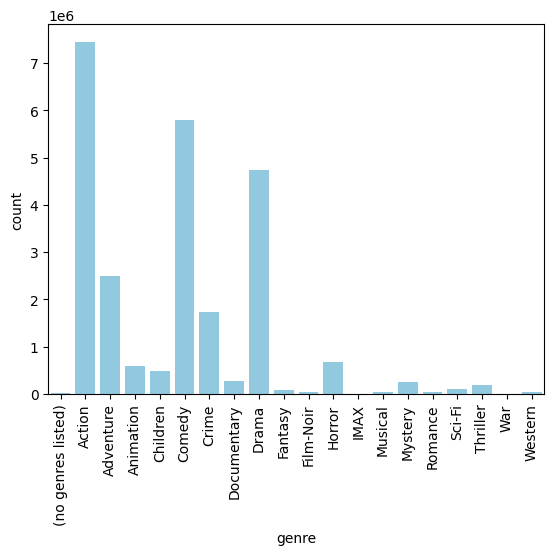

In [32]:
sns.barplot(x = genre.genre, y=genre['count'],color='skyblue')
plt.xticks(rotation=90)
filename="Plots/genre_count.pdf"
plt.savefig(filename, bbox_inches="tight")

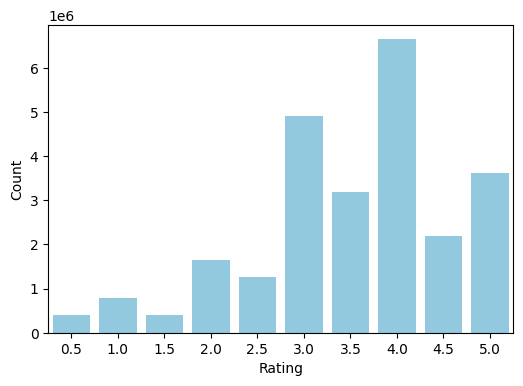

In [33]:
rating_counts = movie_user_df['rating'].value_counts().sort_index()

# Plotting the distribution of ratings
plt.figure(figsize=(6, 4))
sns.barplot(x=rating_counts.index, y=rating_counts.values,color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Count')

filename="Plots/rating_dist.pdf"
plt.savefig(filename, bbox_inches="tight")

In [34]:
movie_user_df['rating'].describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [35]:
movie_popularity = movie_user_df.groupby('movieId')['rating'].count().value_counts().sort_index()

In [36]:
user_ratings_freq = movie_user_df.groupby('userId')['rating'].count().value_counts().sort_index()

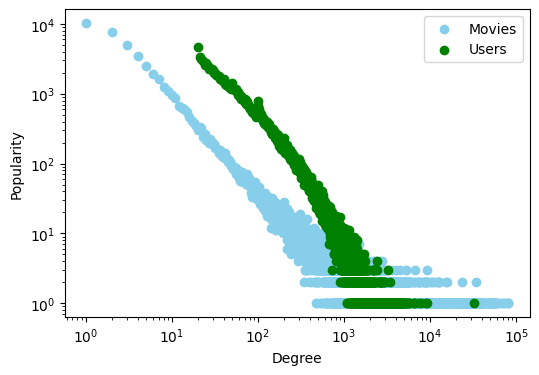

In [37]:
# Plotting the popularity of movie IDs on a logarithmic scale
plt.figure(figsize=(6,4))
plt.scatter(x=movie_popularity.index, y=movie_popularity.values, label="Movies",color='skyblue')
plt.scatter(x=user_ratings_freq.index, y=user_ratings_freq.values,label="Users", color='green')
plt.xlabel('Degree')
plt.ylabel('Popularity')
plt.yscale('log')  
plt.xscale('log')  
plt.legend()

filename="Plots/log_rating_movie_law.pdf"
plt.savefig(filename, bbox_inches="tight")

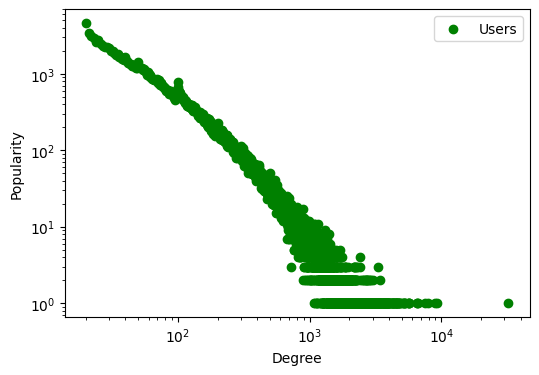

In [38]:
# Plotting the popularity of movie IDs on a logarithmic scale
plt.figure(figsize=(6,4))
plt.scatter(x=user_ratings_freq.index, y=user_ratings_freq.values,label="Users", color='green')
plt.xlabel('Degree')
plt.ylabel('Popularity')
plt.yscale('log')  
plt.xscale('log')  
plt.legend()

filename="Plots/log_rating_user_law.pdf"
plt.savefig(filename, bbox_inches="tight")

In [4]:
path = os.getcwd()+'/DATA/ml-25m/movie_data.xz'
movie_data = read_embeddings(path)
genres_list = movie_data['genre_list']
popularity = movie_data['movie_popularity']
title = movie_data['title']
genres = movie_data['genres']
movie_to_idx ={ m_id:idx for idx, m_id in enumerate( movie_data['movieId'])}

In [22]:
#load model feat_mdl_ltkg_22024-05-11-18:45:28.xz
path = os.getcwd()+ "/model/feat_mdl_ltkg_22024-05-11-18:45:28.xz"
data = read_embeddings(path)
feature_vec2 = data['feature_vec']
fea2_item_vec = data['item_vec']
fea2_rmse_test = data['rmse_test']
fea2_rmse_arr = data['rmse_arr']
fea2_loss = data['loss']
fea2_x = np.arange(len(fea_loss))
fea2_k = data['k']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-0.3334045393225475,
 0.513250002888221,
 -0.2604308462046642,
 0.6429681485721251)

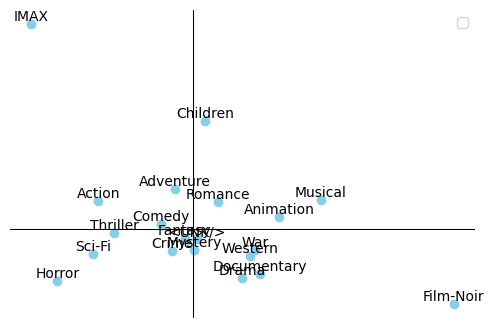

In [23]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(feature_vec2[:,0],feature_vec2[:,1],color='skyblue')

for i, genre in enumerate(genres_list):
    plt.text(feature_vec2[i,0],feature_vec2[i,1],genre,fontsize=10,ha="center",va="bottom")

ax.axvline(0,color='black',lw=0.75)
ax.axhline(0,color='black',lw=0.75)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
plt.legend()  
# plt.show()

filename="Plots/embedings_plot.pdf"
plt.savefig(filename, bbox_inches="tight")
ax.axis("off")

# %downloadfile embedings_plot.pdf

In [25]:
##loading modle feat_mdl_ltkg_202024-05-11-21:37:14
path = os.getcwd()+ "/model/feat_mdl_ltkg_202024-05-11-21:37:14.xz"
data = read_embeddings(path)
feature_vec_20 = data['feature_vec']
fea20_item_vec = data['item_vec']
fea20_rmse_test = data['rmse_test']
fea20_rmse_arr = data['rmse_arr']
fea20_loss = data['loss']
fea20_x = np.arange(len(fea_loss))
fea20_k = data['k']
axlable = ['train','test']
label = ['Epoch','RMSE']

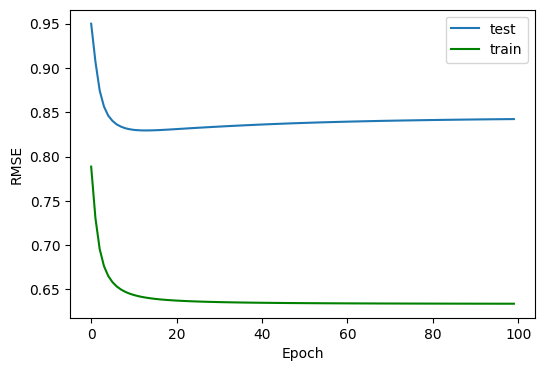

In [15]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(fea20_x,fea20_rmse_test,label=axlable[1])

ax.plot(fea20_x,fea20_rmse_arr,color='g',label=axlable[0])
ax.set_xlabel(label[0])
ax.set_ylabel(label[1])
plt.legend()

filename="Plots/fea_rmes_plot.pdf"
plt.savefig(filename, bbox_inches="tight")

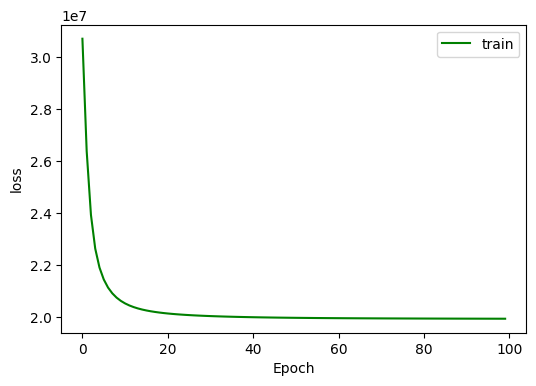

In [16]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(fea20_x,fea20_loss,color='g',label=axlable[0])
ax.set_xlabel(label[0])
ax.set_ylabel("loss")
plt.legend()      

filename="Plots/fea_lose_plot.pdf"
plt.savefig(filename, bbox_inches="tight")

In [27]:
print("K | Train Loss \t| RMSE train \t| RMSE test  ")
print("--------------------------------------------------------------")
print(f"{fea2_k} | {fea2_loss[-1]}| {fea2_rmse_test[-1]}| {fea2_rmse_arr[-1]}")
print(f"{fea20_k} | {fea20_loss[-1]}| {fea20_rmse_test[-1]}| {fea20_rmse_arr[-1]}")

K | Train Loss 	| RMSE train 	| RMSE test  
--------------------------------------------------------------
2 | 31018487.23274079| 0.8179035024617005| 0.7885917152425431
20 | 19939722.53055013| 0.8422218514741701| 0.6339218764394209


In [42]:
#get 40 children, horror and fantasy movies
children = []
horror= []
fantasy = []

for i,genre in enumerate(genres):
    
    if len(children) == 40 and len(horror) == 40 and len(fantasy) == 40:
        break
    
    if 'Children' in genre:
        if len(children) <= 40:
            children.append(i)
        continue
        
    elif "Fantasy" in genre:
        if len(fantasy) <= 40:
            fantasy.append(i)
        continue
        
    elif "Horror" in genre:
        if len(horror) <= 40:
            horror.append(i)
        continue
    else:
        continue
            


(-2.1174082868838022,
 1.7898665999046326,
 -2.5747758647671053,
 2.0573888094905795)

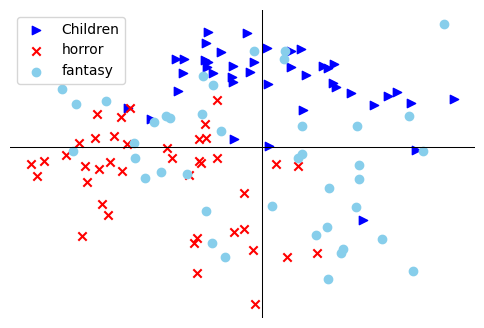

In [44]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(fea2_item_vec[children][:,0],fea2_item_vec[children][:,1],color='blue',marker=">",label="Children")
ax.scatter(fea2_item_vec[horror][:,0],fea2_item_vec[horror][:,1],color='r',marker="x",label="horror")
ax.scatter(fea2_item_vec[fantasy][:,0],fea2_item_vec[fantasy][:,1],color='skyblue',label="fantasy")

ax.axvline(0,color='black',lw=0.75)
ax.axhline(0,color='black',lw=0.75)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
plt.legend()  
# plt.show()

filename="Plots/children_embedings_plot.pdf"
plt.savefig(filename, bbox_inches="tight")
ax.axis("off")

In [8]:
# bia model
path = os.getcwd()+ "/model/biasmdl_ltkg_202024-05-17-23:05:43.xz"
data = read_embeddings(path)
bia_item_vec = data['item_vec']
bia_rmse_test = data['rmse_test']
bia_rmse_arr = data['rmse_arr']
bia_loss = data['loss']
bia_x = np.arange(len(loss))

In [9]:
print(f"loss :{bia_loss[-1]}")
print(f"training RMSE :{bia_rmse_test[-1]}")
print(f"test RMSE :{bia_rmse_arr[-1]}")

loss :38477725.2797619
training RMSE :0.887993357914305
test RMSE :0.8783849613758538


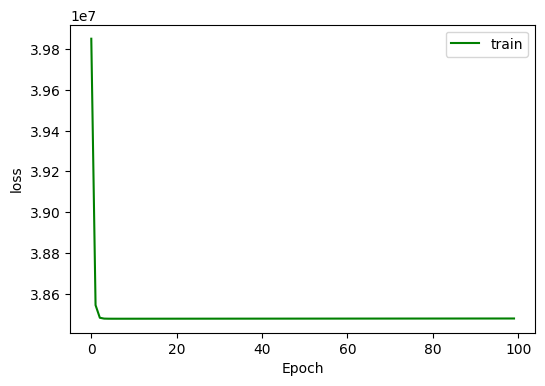

In [10]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(bia_x,bia_loss,color='g',label=axlable[0])
ax.set_xlabel(label[0])
ax.set_ylabel("loss")
plt.legend()      

filename="Plots/bias_lose_plot.pdf"
plt.savefig(filename, bbox_inches="tight")

In [18]:
# @title Model with latent vector
# K = 2
path = os.getcwd()+ "/model/mdl_ltkg_22024-05-17-18:39:58.xz"
data = read_embeddings(path)
l2_item_vec = data['item_vec']
l2_user_vec = data['user_vec']
l2_rmse_test = data['rmse_test']
l2_rmse_arr = data['rmse_arr']
l2_loss = data['loss']
l2_x = np.arange(len(l2_loss))
l2_k = data['k']

In [12]:
# @title Model with latent vector
#K = 5
path = os.getcwd()+ "/model/mdl_ltkg_52024-05-17-21:24:56.xz"
data = read_embeddings(path)
l5_item_vec = data['item_vec']
l5_rmse_test = data['rmse_test']
l5_rmse_arr = data['rmse_arr']
l5_loss = data['loss']
l5_x = np.arange(len(l5_loss))
l5_k = data['k']

In [13]:
# @title Model with latent vector
#K = 10
path = os.getcwd()+ "/model/mdl_ltkg_102024-05-17-20:13:33.xz"
data = read_embeddings(path)
l10_item_vec = data['item_vec']
l10_rmse_test = data['rmse_test']
l10_rmse_arr = data['rmse_arr']
l10_loss = data['loss']
l10_x = np.arange(len(l10_loss))
l10_k = data['k']

In [16]:
# @title Model with latent vector
#K = 20
path = os.getcwd()+ "/model/mdl_ltkg_202024-05-17-17:51:23.xz"
data = read_embeddings(path)
l20_item_vec = data['item_vec']
l20_user_vec = data['user_vec']
l20_rmse_test = data['rmse_test']
l20_rmse_arr = data['rmse_arr']
l20_loss = data['loss']
l20_x = np.arange(len(l20_loss))
l20_k = data['k']

In [15]:
print("K | Train Loss \t| RMSE train \t| RMSE test  ")
print("--------------------------------------------------------------")
print(f"{l2_k} | {l2_loss[-1]}| {l2_rmse_test[-1]}| {l2_rmse_arr[-1]}")
print(f"{l5_k} | {l5_loss[-1]}| {l5_rmse_test[-1]}| {l5_rmse_arr[-1]}")
print(f"{l10_k} | {l10_loss[-1]}| {l10_rmse_test[-1]}| {l10_rmse_arr[-1]}")
print(f"{l20_k} | {l20_loss[-1]}| {l20_rmse_test[-1]}| {l20_rmse_arr[-1]}")

K | Train Loss 	| RMSE train 	| RMSE test  
--------------------------------------------------------------
2 | 31017352.574228577| 0.8178607063170079| 0.7885871996081497
5 | 27642591.0043501| 0.8010810193841685| 0.7447836040459058
10 | 24172736.904626865| 0.8022664881389209| 0.6969990861232082
20 | 19930552.573321808| 0.8419113663195876| 0.6337911717666276


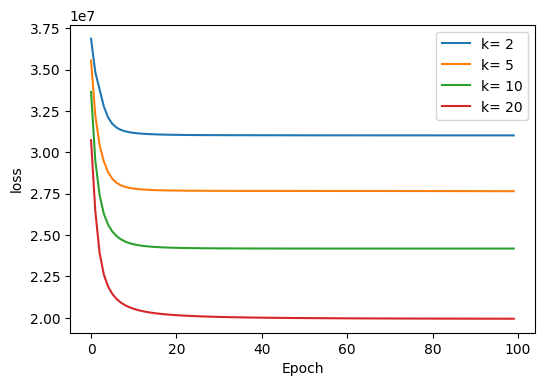

In [16]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(l2_x,l2_loss,label=f"k= {l2_k}")
ax.plot(l5_x,l5_loss,label=f"k= {l5_k}")
ax.plot(l10_x,l10_loss,label=f"k= {l10_k}")
ax.plot(l20_x,l20_loss,label=f"k= {l20_k}")

ax.set_xlabel(label[0])
ax.set_ylabel("loss")
plt.legend()      

filename="Plots/l_lose_plot.pdf"
plt.savefig(filename, bbox_inches="tight")

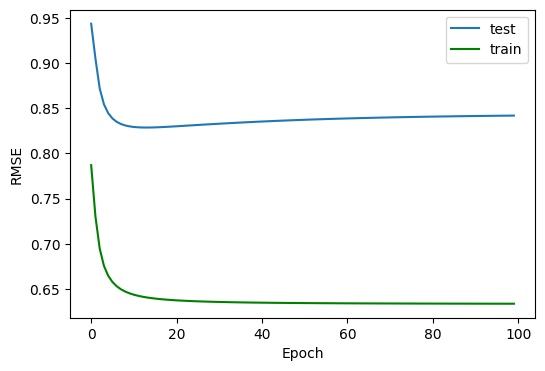

In [17]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(l20_x,l20_rmse_test,label=axlable[1])
ax.plot(l20_x,l20_rmse_arr,color='g',label=axlable[0])

ax.set_xlabel(label[0])
ax.set_ylabel(label[1])
plt.legend()

filename="Plots/l20_rmes_plot.pdf"
plt.savefig(filename, bbox_inches="tight")

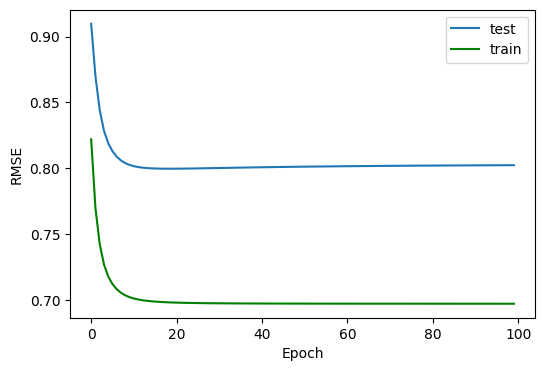

In [18]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(l10_x,l10_rmse_test,label=axlable[1])
ax.plot(l10_x,l10_rmse_arr,color='g',label=axlable[0])

ax.set_xlabel(label[0])
ax.set_ylabel(label[1])
plt.legend()

filename="Plots/l10_rmes_plot.pdf"
plt.savefig(filename, bbox_inches="tight")

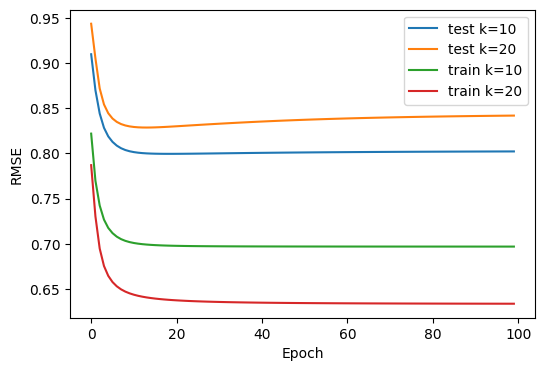

In [19]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(l10_x,l10_rmse_test,label=f"test k={l10_k}")
ax.plot(l20_x,l20_rmse_test,label=f"test k={l20_k}")
ax.plot(l10_x,l10_rmse_arr,label=f"train k={l10_k}")
ax.plot(l20_x,l20_rmse_arr,label=f"train k={l20_k}")

ax.set_xlabel(label[0])
ax.set_ylabel(label[1])
plt.legend()

filename="Plots/l_10_20_rmes_plot.pdf"
plt.savefig(filename, bbox_inches="tight")

In [2]:
import model

In [3]:
movies_df = pd.read_csv(f'{dir}/DATA/ml-25m/movies.csv')

In [14]:
model.search_movie_title('lord of the ring',movies_df)

,movieId,title,genres
2026,2116,"Lord of the Rings, The (1978)",Adventure|Animation|Children|Fantasy
4887,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
5840,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy
7028,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy


In [15]:
mid=  4993
new_user = [(movie_to_idx[mid],5)]
# new_user = [(movie_to_idx[493],5)]
vec = model.predict(new_user,"mdl_ltkg_202024-05-17-17:51:23.xz")
# vec = model.predict(new_user,"feat_mdl_ltkg_202024-05-11-21:37:14.xz")
model.get_top_10(vec,mid)

Epoch: 100%|█████████████████████████████████| 50/50 [00:00<00:00, 18989.06it/s]


=================== Movie Seen ===========================
Lord of the Rings: The Fellowship of the Ring, The (2001) | Genre : ['Adventure', 'Fantasy']

=================== Recommended movies ===================
Lord of the Rings: The Return of the King, The (2003) | Genre : ['Action', 'Adventure', 'Drama', 'Fantasy']
Lord of the Rings: The Two Towers, The (2002) | Genre : ['Adventure', 'Fantasy']
Lord of the Rings: The Fellowship of the Ring, The (2001) | Genre : ['Adventure', 'Fantasy']
Hobbit: An Unexpected Journey, The (2012) | Genre : ['Adventure', 'Fantasy', 'IMAX']
The Hobbit: The Battle of the Five Armies (2014) | Genre : ['Adventure', 'Fantasy']
Hobbit: The Desolation of Smaug, The (2013) | Genre : ['Adventure', 'Fantasy', 'IMAX']
Harry Potter and the Deathly Hallows: Part 2 (2011) | Genre : ['Action', 'Adventure', 'Drama', 'Fantasy', 'Mystery', 'IMAX']
Harry Potter and the Half-Blood Prince (2009) | Genre : ['Adventure', 'Fantasy', 'Mystery', 'Romance', 'IMAX']
Harry Potter 

In [234]:
# Calculate variances for each movie
item_dist = np.linalg.norm(l20_item_vec.T, axis=0)

pole = np.argsort(item_dist)[::-1]
pole_on_rank = [ i for i in pole if popularity[i] > 1000]

polarizing_m = np.concatenate((pole_on_rank[:10],pole_on_rank[-5:]))

In [246]:
title[polarizing_m[0]]

'Plan 9 from Outer Space (1959)'

In [244]:
title[polarizing_m[-1]]

'Escape from Alcatraz (1979)'

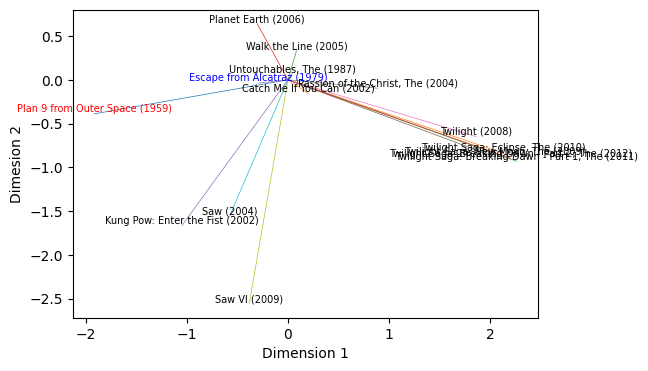

In [245]:
l2_pole = l2_item_vec[polarizing_m]
titles = np.array(title)[polarizing_m]
fig, ax = plt.subplots(figsize=(6,4))
for i,ple in enumerate(l2_pole):
    ax.plot([0, ple[0]],[0,ple[1]],lw=0.5)
    if i == 0:
        plt.text(ple[0],ple[1],titles[i],fontsize=7, color="r",ha="center",va="bottom")
    elif i == 14:
        plt.text(ple[0],ple[1],titles[i],fontsize=7,color="blue",ha="center",va="bottom")
    else:
        plt.text(ple[0],ple[1],titles[i],fontsize=7,ha="center",va="bottom")
        

ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimesion 2")
# plt.legend()      

filename="Plots/polarity_plot.pdf"
plt.savefig(filename, bbox_inches="tight")